In [1]:
from scipy.cluster import hierarchy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import ripser
import dionysus

### Data point cloud definition

[Text(0.5, 1.0, 'data points'),
 Text(0.5, 0, 'x coord'),
 Text(0, 0.5, 'y coord')]

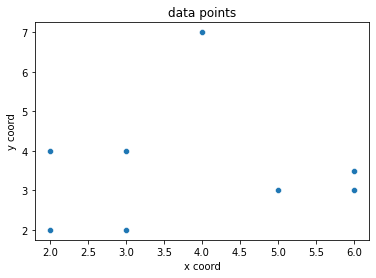

In [2]:
data_points = [[2,2], [3,4], [2,4], [3,2], [5,3], [6,3], [6,3.5], [4,7]]
sns.scatterplot(
    x=[x[0] for x in data_points], y=[x[1] for x in data_points]
).set(
    title='data points', xlabel='x coord', ylabel='y coord'
)

### Heirarchical clustering

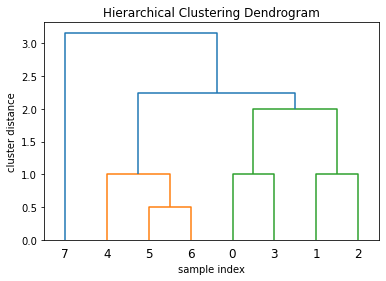

In [3]:
plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('cluster distance')
Z = hierarchy.linkage(data_points, 'single')
dn = hierarchy.dendrogram(Z)

### Persistent homology using Ripser

We can work out the Vietoris-Rips homology using this package. The zeroth homology groups tell us about the number of disconnected components, and so we get a death every time clusters fuse. So the cluster distances in the above dendogram where clusters fuse correspond to the deaths of H_0s below.

The H_1 result corresponds to the loop made by the 4 points in the bottom left; the loop exists once a cluster distance of 2 is reached, and is then filled in once a cluster distance of 2.2 is reached (in the sense that diagonally opposite vertices are within the cluster distance, and so the loop has a simplicial covering whose boundary is the loop).

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


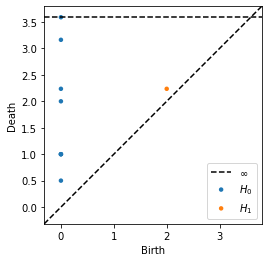

In [4]:
rips = ripser.Rips(maxdim=1)
diagrams = rips.fit_transform(np.array(data_points))
rips.plot(diagrams)

### Persistent homology using Dionysus

Similar to ripser, except a bit more hands on.

Create simplices, filtrations and initialise diagrams

In [5]:
f = dionysus.fill_rips(np.array(data_points), 10, 10.)
p = dionysus.homology_persistence(f)
dgms = dionysus.init_diagrams(p, f)

Represent homology group diagrams as bar codes

/home/jasbir.nagi/miniconda3/envs/persistent_homology_play_env/lib/python3.8/site-packages/dionysus/plot.py:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


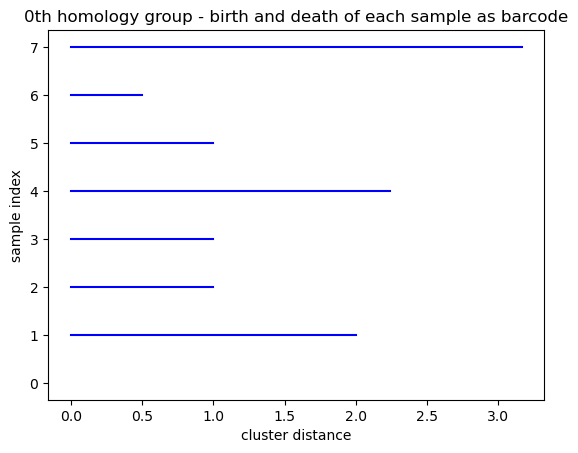

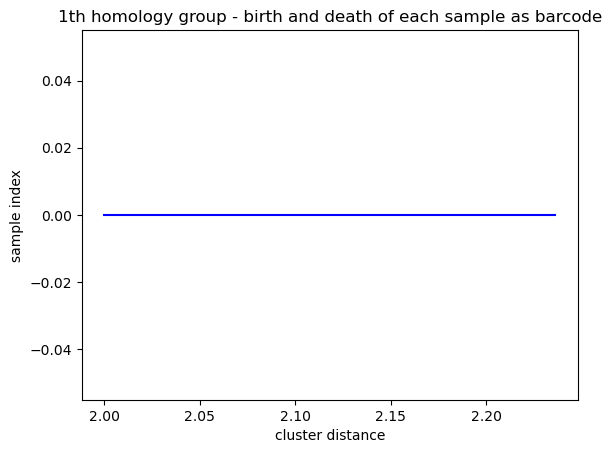

In [6]:
for homology_index in [0,1]:
    plt.figure()
    plt.title(str(homology_index)+'th homology group - birth and death of each sample as barcode')
    plt.xlabel('cluster distance')
    plt.ylabel('sample index')
    dionysus.plot.plot_bars(dgms[homology_index], show = True)


Represent homology group diagrams as birth/death diagrams. Yields the same diagrams as above for ripser.

/home/jasbir.nagi/miniconda3/envs/persistent_homology_play_env/lib/python3.8/site-packages/dionysus/plot.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


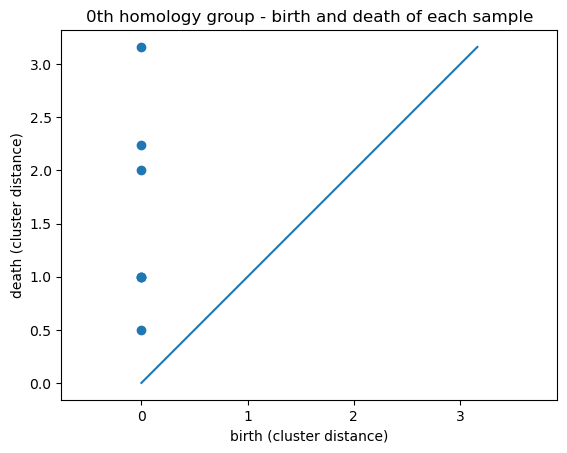

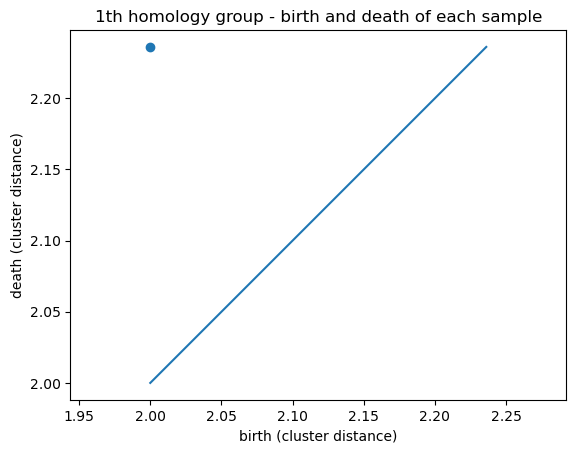

In [7]:
for homology_index in [0,1]:
    plt.figure()
    plt.title(str(homology_index)+'th homology group - birth and death of each sample')
    plt.xlabel('birth (cluster distance)')
    plt.ylabel('death (cluster distance)')
    dionysus.plot.plot_diagram(dgms[homology_index], show = True)